In [90]:
#importing the neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [91]:
#To read the csv file
data = pd.read_csv("/content/tested.csv")

In [92]:
#To get the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
#To get the last 5 rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [94]:
#To check the column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
#To check the shape of our dataset
data.shape

(418, 12)

In [96]:
#To check null values
data.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [97]:
#filling the null values in age column
data['Age'].fillna(data['Age'].mean(),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [98]:
data['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [99]:
#Replacing the missing values in fare column
data['Fare'].fillna(data['Fare'].mean(), inplace=True)


In [100]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [101]:
#To get statistical details
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [102]:
#To check the number of people survived
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [103]:
#To check the number of male and female
data['Sex'].value_counts()


male      266
female    152
Name: Sex, dtype: int64

In [104]:
#to check the class of the passenger
data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

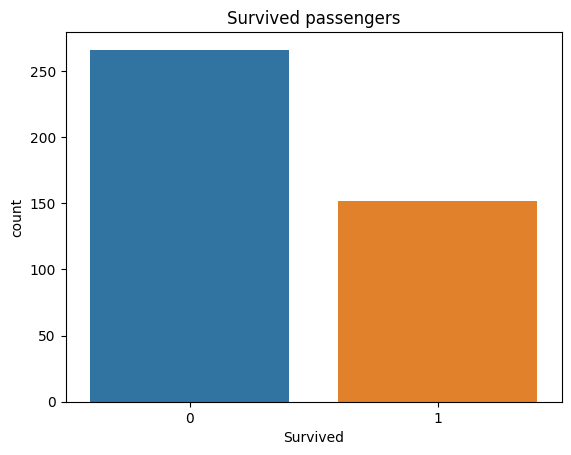

In [105]:
#visualizing the survival
sns.countplot(x = 'Survived', data = data).set_title('Survived passengers')
plt.show()

In [106]:
#Covert the Sex column into numerical
labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])

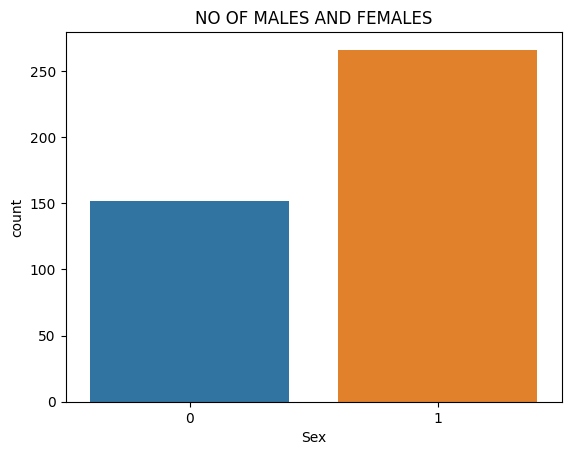

In [107]:
sns.countplot(x = 'Sex',data = data).set_title("NO OF MALES AND FEMALES")
plt.show()

In [108]:
features = data[['Pclass','Age','Sex']]
x = features
y = data['Survived']


In [109]:
print(x)

     Pclass       Age  Sex
0         3  34.50000    1
1         3  47.00000    0
2         2  62.00000    1
3         3  27.00000    1
4         3  22.00000    0
..      ...       ...  ...
413       3  30.27259    1
414       1  39.00000    0
415       3  38.50000    1
416       3  30.27259    1
417       3  30.27259    1

[418 rows x 3 columns]


In [110]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [111]:
#spliting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [112]:
data.shape

(418, 12)

In [113]:
#building a model
model = LogisticRegression()
#training the model with training data
model.fit(x_train,y_train)

LogisticRegression()

In [115]:
#testing the accuracy of training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print(training_data_accuracy)

1.0


In [116]:
#testing the accuracy of testing data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)
print(testing_data_accuracy)

1.0


In [123]:
#building a prediction model
input = [3,47,0]
input_as_numpy_array = np.asarray(input)                  #coverting the input data into numpy array
input_data_reshaped = input_as_numpy_array.reshape(1,-1)  # reshaping the coverted numpy input array
prediction = model.predict(input_data_reshaped)

if prediction[0]==0:
  print("The passenger has not survived")
else:
  print("The passenger has survived")


The passenger has survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
